In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_curve,roc_auc_score
import AirBnB as ab

In [69]:
#Get the airbnb data and look at the first 5 lines: calendar.csv, listings.csv, reviews.csv

file_path="./calendar.csv"
fpath="./"
fname="temp_output.csv"

calendar_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(calendar_df)

file_path="./listings.csv"
listings_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(listings_df)

file_path="./reviews.csv"
reviews_df=ab.read_file(file_path) 
five_lines=ab.get_five_lines(reviews_df)


In [70]:
#Checking for missing data in calendar.csv

ab.get_no_missing_cols(calendar_df)

{'available', 'date', 'listing_id'}

In [71]:
#Getting the shape
calendar_df.shape

(1393570, 4)

In [72]:
# Taking the first file calendar.csv and asking the following questions
# 1) What are the busiest times of the year to visit Seattle?

calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df.head()
pd.unique(calendar_df['month'])
calendar_df['month'].value_counts()
calendar_df['month'].value_counts().sort_values(ascending=False)

3     118358
5     118358
7     118358
8     118358
10    118358
12    118358
1     114540
4     114540
6     114540
9     114540
11    114540
2     110722
Name: month, dtype: int64

In [73]:
# How much price data are we missing? 
calendar_df.isnull().mean()
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
year           int64
month          int64
dtype: object

In [74]:
#Checking for the busiest months missing data - inline with main months, decide to drop na
categories=[12,10,8,7,5,3]
busiest_df=calendar_df[calendar_df['month'].isin(categories)]
busiest_df['price'].isnull().mean()

0.31848431594540855

In [75]:
# Putting price into float to be able to process further
calendar_df['price'] = calendar_df['price'].str.replace(',','').str.replace('$','').astype('float')

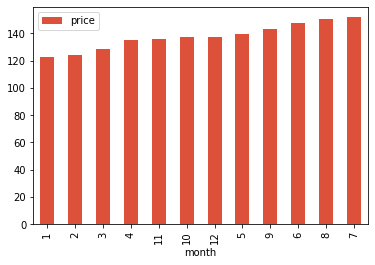

In [76]:
# 2) How much do prices spike over the most frequently booked months

# drop na
calendar_df.dropna(inplace=True)

#getting the mean price and sort values
price_df=calendar_df.groupby(["month"]).price.mean().to_frame()

price_df=price_df.sort_values(by='price')

#plotting the whole thing
color = cm.inferno_r(np.linspace(.4, .8, 12))

price_df.plot(kind='bar', stacked=True, color=color)


In [77]:
# Figuring out the peak months and non-peak months and get price spikes
busiest_df=price_df.loc[[12,10,8,7,5,3],:]

non_busiest_df=price_df.loc[[11,9,6,4,2,1],:]

avg_low=non_busiest_df['price'].sum()/6

print(avg_low)

busiest_df['spike']=(busiest_df['price']-avg_low)/avg_low

busiest_df



134.78682203437413


,price,spike
month,,
12,137.251835,0.018288
10,137.031939,0.016657
8,150.656594,0.117740
7,152.094150,0.128405
5,139.538183,0.035251
3,128.644488,-0.045571


In [78]:
# Taking the first file listings.csv and asking the following questions:
# 3) What are some of the neighborhoods that people visit in Seattle, neighborhood_group_cleansed, and listings

columns=['id','neighbourhood_group_cleansed']
listings_df.shape
new_df=listings_df[columns]

listings_df['neighbourhood_group_cleansed'].isnull().mean()

neighbourhood_listing_df=new_df.groupby(['neighbourhood_group_cleansed']).id.count().to_frame()

neighbourhood_listing_df.sort_values(by='id',ascending=False)

,id
neighbourhood_group_cleansed,
Other neighborhoods,794
Capitol Hill,567
Downtown,530
Central Area,369
Queen Anne,295
Ballard,230
West Seattle,203
Rainier Valley,159
University District,122


In [79]:
#4) Can the following columns predict how high the price of the listing will be? [number_of_reviews, review_score_rating, price]
# Putting price into float to be able to process further
listings_df['price'] = listings_df['price'].str.replace(',','').str.replace('$','').astype('float')

In [80]:
#Checking for missing data
print(ab.check_cols_null(listings_df,'price'))

0.0


In [81]:
print(ab.check_cols_null(listings_df,'number_of_reviews'))


0.0


In [82]:
print(ab.check_cols_null(listings_df,'review_scores_rating'))

0.16946045049764275


In [83]:
listings_df.isnull().values.any()

True

In [84]:
# Getting the listing columns and figuring out to drop review_scores_rating null data since it's under 20% missing. 
columns=['price','number_of_reviews','review_scores_rating']
listing_price_df=listings_df[columns]
listing_price_df.shape
listing_price_df.head()

#Decide to drop na for review score rating
listing_price_df=listing_price_df.dropna(subset=['review_scores_rating'])
listing_price_df.shape

(3171, 3)

In [85]:
# Running Linear Model
listing_price_cols = ['number_of_reviews', 'review_scores_rating']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df, 'price', listing_price_cols, dummy_na=False)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.019743085600305355 on 952 values.'

In [86]:
# Running Linear Model
listing_price_cols = ['number_of_reviews', 'review_scores_rating']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was -1.1389076692493109e+28 on 952 values.'

In [87]:
#How about we split the review_scores_ratings and number of reviews into bins instead and see if processed as categorical variables, the linear model will fit better? 

listing_price_df['review_scores_rating']=listing_price_df['review_scores_rating'].astype('float')
listing_price_df.head()
listing_price_df['review_scores_rating_bins']=pd.cut(listing_price_df.review_scores_rating,bins = [0,85.0,90.0,95.0,97.0,100.0])
listing_price_df.head()
listing_price_df['review_scores_rating_bins'].value_counts().sort_index()
listing_price_df['score_sentiment']=pd.cut(listing_price_df.review_scores_rating,bins = [0,85.0,90.0,95.0,97.0,100.0],labels=['Bad','Fair','Good','Average','Best'])
listing_price_df.head()


,price,number_of_reviews,review_scores_rating,review_scores_rating_bins,score_sentiment
0,85.0,207,95.0,"(90.0, 95.0]",Good
1,150.0,43,96.0,"(95.0, 97.0]",Average
2,975.0,20,97.0,"(95.0, 97.0]",Average
4,450.0,38,92.0,"(90.0, 95.0]",Good
5,120.0,17,95.0,"(90.0, 95.0]",Good


In [88]:
#How about we split the review_scores_ratings also into bins as well. 

listing_price_df['number_of_reviews']=listing_price_df['number_of_reviews'].astype('float')
listing_price_df.head()
listing_price_df['number_of_reviews'].describe()

count    3171.000000
mean       26.751498
std        39.914223
min         1.000000
25%         4.000000
50%        13.000000
75%        32.000000
max       474.000000
Name: number_of_reviews, dtype: float64

In [89]:
listing_price_df['number_of_reviews']=pd.cut(listing_price_df.review_scores_rating,bins = [0,100,200,300,400,500])
listing_price_df.head()
listing_price_df['number_of_reviews'].value_counts().sort_index()
listing_price_df['number_of_reviews_cat']=pd.cut(listing_price_df.review_scores_rating,bins = [0,100,200,300,400,500],labels=['None','Low','Low Med','Med','High'])
listing_price_df.head()

,price,number_of_reviews,review_scores_rating,review_scores_rating_bins,score_sentiment,number_of_reviews_cat
0,85.0,"(0, 100]",95.0,"(90.0, 95.0]",Good,None
1,150.0,"(0, 100]",96.0,"(95.0, 97.0]",Average,None
2,975.0,"(0, 100]",97.0,"(95.0, 97.0]",Average,None
4,450.0,"(0, 100]",92.0,"(90.0, 95.0]",Good,None
5,120.0,"(0, 100]",95.0,"(90.0, 95.0]",Good,None


In [90]:
# Running Linear Model on both categorical variables
listing_price_df2=listing_price_df[['price','number_of_reviews_cat', 'score_sentiment']]
listing_price_cols = ['number_of_reviews_cat', 'score_sentiment']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df2, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.0072219156898417625 on 952 values.'

In [91]:
#Running Linear Model on just score_sentiment

In [92]:
# Running Linear Model on number_of_reviews before bins and score_sentiment after binning
listing_price_df2=listing_price_df[['price','number_of_reviews','score_sentiment']]
listing_price_cols = ['number_of_reviews','score_sentiment']
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = ab.clean_fit_linear_mod(listing_price_df2, 'price', listing_price_cols, dummy_na=True)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.0072219156898417625 on 952 values.'

In [122]:
# Since we've binned variables that are now categorical, we can try using the logistic regression instead of a linear model. Instead of predicting the price as a quantitative number, we can see if we can predict price as High or Low. 
listing_price_df2=listing_price_df[['price','number_of_reviews_cat', 'score_sentiment']]
listing_price_df2['price'].describe()
listing_price_df2['price_bins']=pd.cut(listing_price_df.price,bins = [0,128,1000])
listing_price_df2['price_bins'].value_counts().sort_index()


/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(0, 128]       2084
(128, 1000]    1087
Name: price_bins, dtype: int64

In [123]:
#binning the price as either high or low to setup for logistic regression
listing_price_df2['price_hi_low']=pd.cut(listing_price_df2.price,bins = [0,128,1000],labels=[0,1])
listing_price_df2.head()

/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,number_of_reviews_cat,score_sentiment,price_bins,price_hi_low
0,85.0,None,Good,"(0, 128]",0
1,150.0,None,Average,"(128, 1000]",1
2,975.0,None,Average,"(128, 1000]",1
4,450.0,None,Good,"(128, 1000]",1
5,120.0,None,Good,"(0, 128]",0


In [119]:
# Running logistic regression on score_sentiment against price_high_low
cat_cols=['score_sentiment']
df=ab.create_dummy_df(listing_price_df2, cat_cols, 'True')
df.head()
df.drop(['price','price_bins','number_of_reviews_cat'], axis = 1, inplace = True)
df.head()

,price_hi_low,score_sentiment_Fair,score_sentiment_Good,score_sentiment_Average,score_sentiment_Best,score_sentiment_nan
0,0,0,1,0,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
4,1,0,1,0,0,0
5,0,0,1,0,0,0


In [120]:
# Running Logistic Regression
y_data=df['price_hi_low']
x_data=df.drop('price_hi_low', axis=1)
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
#Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Train the model and create predictions
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

#Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions))
#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_data, predictions))



              precision    recall  f1-score   support

           0       0.64      1.00      0.78       614
           1       0.00      0.00      0.00       338

    accuracy                           0.64       952
   macro avg       0.32      0.50      0.39       952
weighted avg       0.42      0.64      0.51       952

[[614   0]
 [338   0]]


/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/junwu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


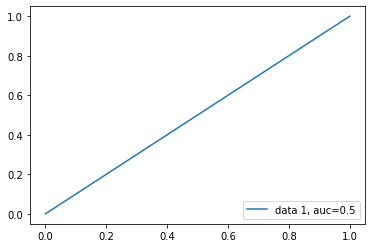

In [121]:
#Graphing the auc curve
fpr, tpr, _ = roc_curve(y_test_data,predictions)
auc = roc_auc_score(y_test_data, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()